<a href="https://colab.research.google.com/github/Stramasso/A3CONTROLE-IA/blob/main/projeto_a3_sistemasdecontrole_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTANDO BIBLIOTECAS NECESSÁRIAS PARA O PROJETO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from google.colab import files

#FAZENDO O UPLOAD DO DATASET PARA O DESENVOLVIMENTO
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

print(data.head())

Saving Soil Moisture, Air Temperature and humidity, and Water Motor onoff Monitor data.AmritpalKaur.csv to Soil Moisture, Air Temperature and humidity, and Water Motor onoff Monitor data.AmritpalKaur (2).csv
   Soil Moisture  Temperature  Air Humidity  Pump Data
0     683.802906    29.184908     71.789699          0
1     408.571567    33.707205     77.977391          1
2     659.092074    24.760311     60.776282          1
3     842.929764    32.738515     59.323543          0
4     414.199320    25.692744     66.624914          1


In [ ]:
#EXIBINDO AS INFORMAÇÔES DO DATAFRAME
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Soil Moisture  3000 non-null   float64
 1   Temperature    3000 non-null   float64
 2   Air Humidity   3000 non-null   float64
 3   Pump Data      3000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 93.9 KB
None


In [ ]:
#VERIFICANDO A QUANTIDADE DE VALORES NULOS NO DATAFRAME
print("Valores ausentes:")
print(data.isnull().sum())


Valores ausentes:
Soil Moisture    0
Temperature      0
Air Humidity     0
Pump Data        0
dtype: int64


In [ ]:
#EXIBINDO AS ESTATÍSTICAS DESCRITIVAS DOS DADOS DO DATAFRAME
print("Estatísticas descritivas:")
print(data.describe())

Estatísticas descritivas:
       Soil Moisture  Temperature  Air Humidity    Pump Data
count    3000.000000  3000.000000   3000.000000  3000.000000
mean      662.419754    28.443043     59.387209     0.523000
std       187.936297     6.018565     12.428161     0.499554
min       314.511016    18.002132     38.000201     0.000000
25%       501.362575    23.320750     48.661993     0.000000
50%       666.578554    28.361854     58.975423     1.000000
75%       821.867423    33.595989     70.138397     1.000000
max       984.828010    38.992770     81.267407     1.000000


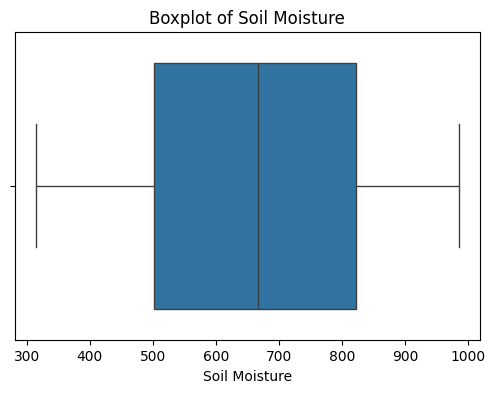

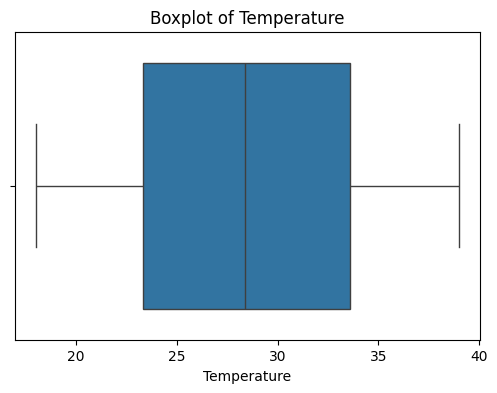

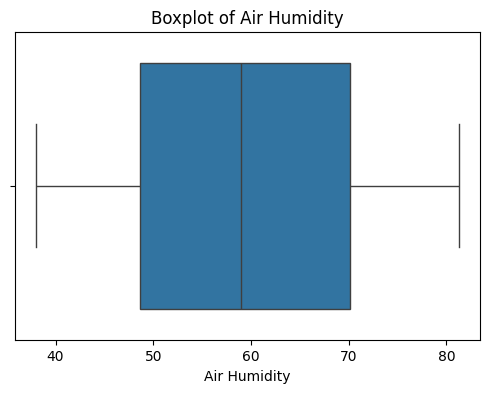

In [ ]:
#EXIBINDO BOXPLOTS DOS DADOS PARA VERIFICARMOS OUTLIERS
for column in ['Soil Moisture', 'Temperature', 'Air Humidity']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


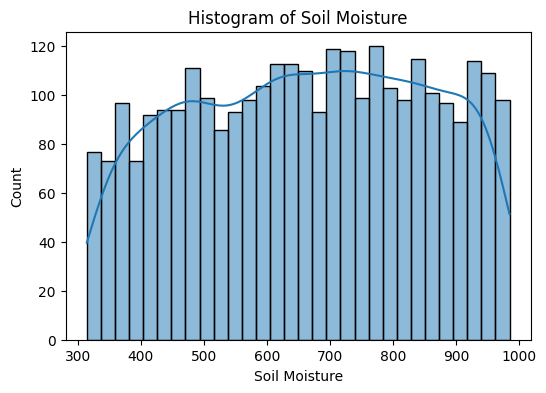

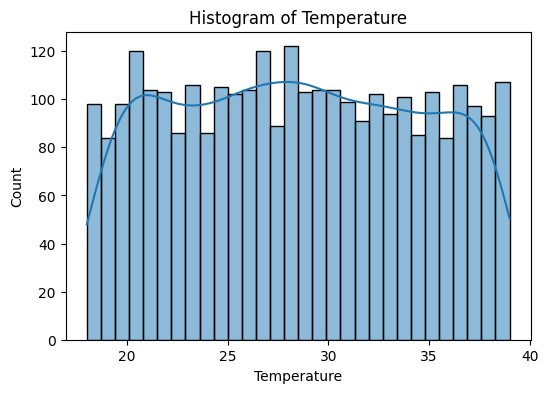

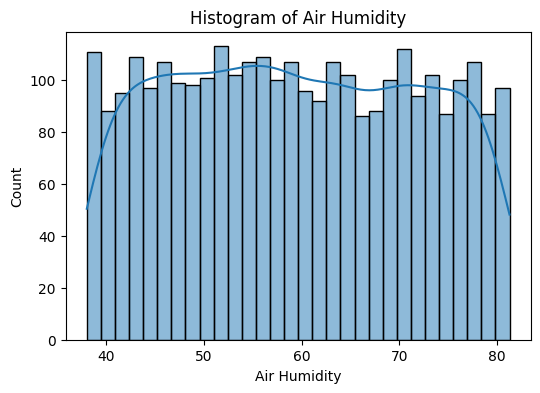

In [ ]:
#EXIBINDO HISTOGRAMAS PARA VERIFICARMOS SE OS DADOS ESTÃO BEM DISTRIBUÍDOS
for column in ['Soil Moisture', 'Temperature', 'Air Humidity']:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()


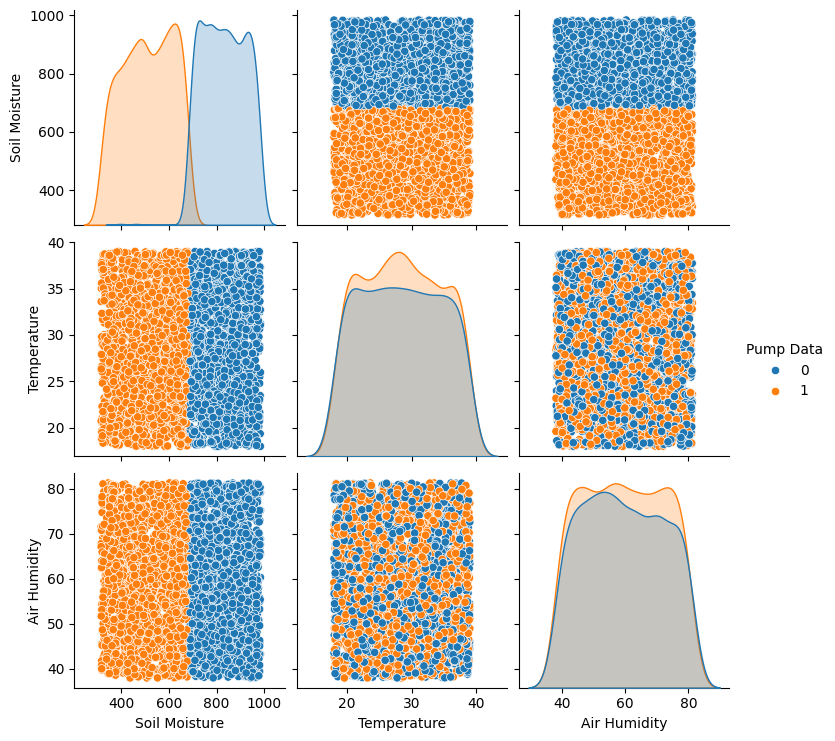

In [ ]:
#EXIBINDO GRÁFICOS DE CORRELAÇÃO PARA COMPARARMOS ALGUNS DADOS
sns.pairplot(data, hue='Pump Data')
plt.show()

In [ ]:
#IMPORTANDO BIBLIOTECAS PARA A APLICAÇÃO DO RNA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [ ]:
#DEFININDO O ESTADO DA BOMBA DE ÁGUA COMO ALVO
X = data[['Soil Moisture', 'Temperature', 'Air Humidity']]
y = data['Pump Data']


In [ ]:
#CALCULANDO PESOS POR CLASSES
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Pesos por Classe:", class_weight_dict)


Pesos por Classe: {0: 1.0482180293501049, 1: 0.9560229445506692}


In [ ]:
#SEPARANDO OS DADOS EM TESTES E TREINOS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#NORMALIZANDO OS DADOS
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#APLICANDO A REDE NEURAL ARTIFICIAL
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=500)

In [ ]:
#TREINANDO A INTELIGÊNCIA ARTIFICIAL
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500)

In [ ]:
#TESTANDO AS PREVISÕES DA IA
y_pred_mlp = mlp.predict(X_test_scaled)

In [ ]:
#DEFININDO A ACURÁCIA, RELATÓRIO DE CLASSIFICAÇÃO E MATRIZ DE CONFUSÃO DA IA
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

In [ ]:
#DEMONSTRANDO OS DADOS DEFINIDOS NA CELULA ANTERIOR
print("Acurácia:", accuracy_mlp)
print("\nRelatório de Classificação:\n", classification_rep_mlp)
print("\nMatriz de Confusão:\n", conf_matrix_mlp)
#PODEMOS PERCEBER QUE A PRECISÃO ESTÁ DANDO MUITO PRÓXIMA DE 1 SEMPRE
#O QUE NOS FAZ ACREDITAR QUE ALGO ESTÁ ERRADO

Acurácia: 0.9983333333333333

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       287

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600


Matriz de Confusão:
 [[313   0]
 [  1 286]]


In [ ]:
#IMPORTANDO AS BIBLIOTECAS PARA APLICAR O FUZZY
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# UTILIZANDO A VAZÃO MÁXIMA DE UMA BOMBA DE ÁGUA ALEATÓRIA COMO EXEMPLO
# https://www.mhtshopping.com.br/bomba-centrifuga-qe-25-wdm-500-cv-motor-weg-trifasico?gad_source=1
# VAZÃO MÁXIMA (EXEMPLO) 90.1 M^3/h

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.1 MB/s eta 0:00:00


In [ ]:
#DEFININDO HUMIDADE DO SOLO, TEMPERATURA E HUMIDADE DO AR COMO ENTRADAS
#DEFININDO O ESTADO DA BOMBA COMO SAÍDA
soil_moisture = ctrl.Antecedent(np.arange(0, 1001, 1), 'Soil Moisture')
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'Temperature')
air_humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'Air Humidity')
pump = ctrl.Consequent(np.arange(0, 2, 1), 'Pump')

In [ ]:
#DEFININDO PARA AS ENTRADAS AS FUNÇÕES DE VALORES CONSIDERADOS BAIXOS, MÉDIOS E ALTOS
#DEFININDO PARA A SAÍDA A FUNÇÃO QUE REPRESENTARIA O ESTADO DESLIGADO E LIGADO
soil_moisture['low'] = fuzz.trapmf(soil_moisture.universe, [0, 0, 300, 500])
soil_moisture['medium'] = fuzz.trimf(soil_moisture.universe, [300, 500, 700])
soil_moisture['high'] = fuzz.trapmf(soil_moisture.universe, [500, 700, 1000, 1000])

temperature['low'] = fuzz.trapmf(temperature.universe, [0, 0, 15, 25])
temperature['medium'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['high'] = fuzz.trapmf(temperature.universe, [25, 35, 50, 50])

air_humidity['low'] = fuzz.trapmf(air_humidity.universe, [0, 0, 30, 50])
air_humidity['medium'] = fuzz.trimf(air_humidity.universe, [30, 50, 70])
air_humidity['high'] = fuzz.trapmf(air_humidity.universe, [50, 70, 100, 100])

pump['off'] = fuzz.trimf(pump.universe, [0, 0, 1])
pump['on'] = fuzz.trimf(pump.universe, [0, 1, 1])

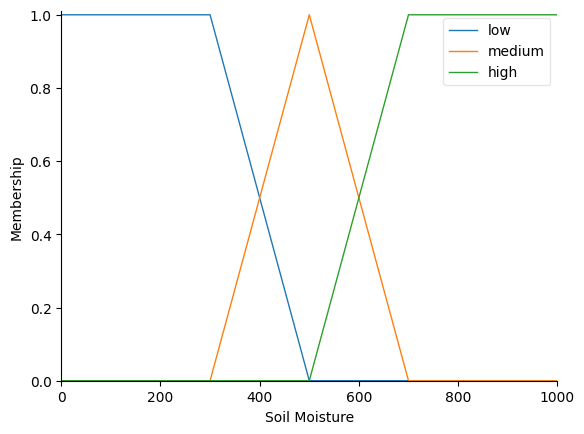

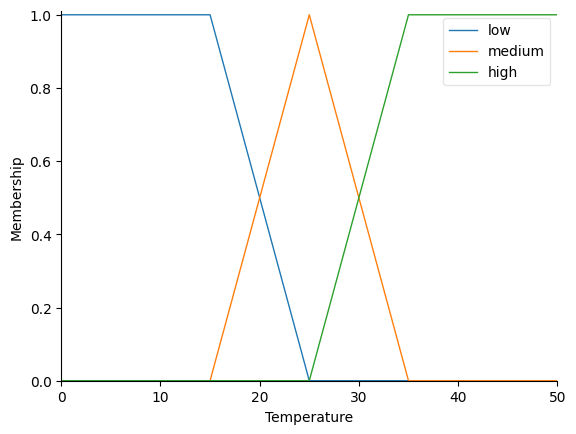

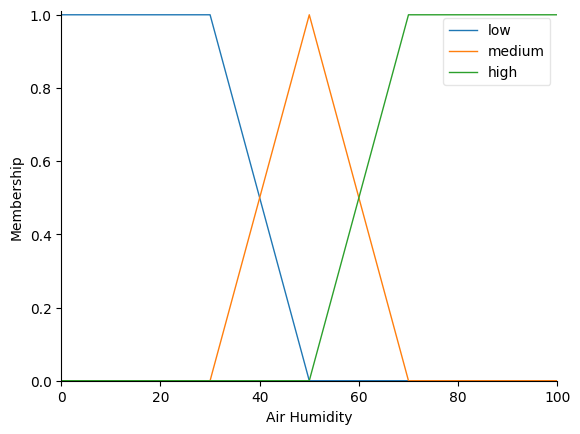

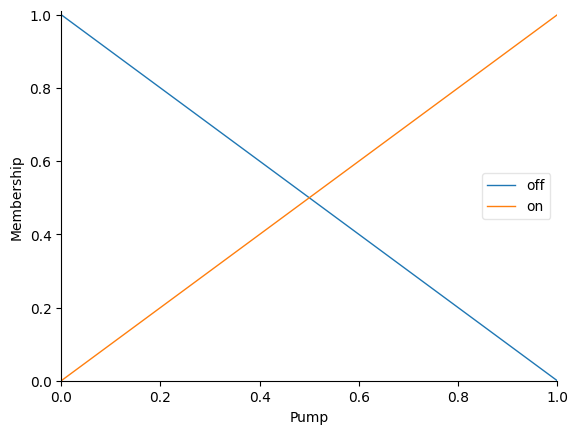

In [ ]:
#VISUALIZANDO AS FUNÇÕES TRAPEZOIDAIS DAS ENTRADAS E DA SAÍDA
soil_moisture.view()
temperature.view()
air_humidity.view()
pump.view()

In [ ]:
#DEFININDO AS REGRAS DAS FUNÇÕES HUMIDADE DO SOLO, TEMPERATURA E HUMIDADE PARA QUE A BOMBA ESTEJA LIGADA OU DESLIGADA
#SEGUIMOS A PRIORIDADE HUMIDADE DO SOLO > TEMPERATURA > HUMIDADE DO AR
rule1 = ctrl.Rule(soil_moisture['low'] & temperature['low'] & air_humidity['low'], pump['on'])
rule2 = ctrl.Rule(soil_moisture['low'] & temperature['low'] & air_humidity['medium'], pump['on'])
rule3 = ctrl.Rule(soil_moisture['low'] & temperature['low'] & air_humidity['high'], pump['on'])
rule4 = ctrl.Rule(soil_moisture['low'] & temperature['medium'] & air_humidity['low'], pump['on'])
rule5 = ctrl.Rule(soil_moisture['low'] & temperature['medium'] & air_humidity['medium'], pump['on'])
rule6 = ctrl.Rule(soil_moisture['low'] & temperature['medium'] & air_humidity['high'], pump['on'])
rule7 = ctrl.Rule(soil_moisture['low'] & temperature['high'] & air_humidity['low'], pump['on'])
rule8 = ctrl.Rule(soil_moisture['low'] & temperature['high'] & air_humidity['medium'], pump['on'])
rule9 = ctrl.Rule(soil_moisture['low'] & temperature['high'] & air_humidity['high'], pump['on'])

rule10 = ctrl.Rule(soil_moisture['medium'] & temperature['low'] & air_humidity['low'], pump['off'])
rule11 = ctrl.Rule(soil_moisture['medium'] & temperature['low'] & air_humidity['medium'], pump['off'])
rule12 = ctrl.Rule(soil_moisture['medium'] & temperature['low'] & air_humidity['high'], pump['off'])
rule13 = ctrl.Rule(soil_moisture['medium'] & temperature['medium'] & air_humidity['low'], pump['off'])
rule14 = ctrl.Rule(soil_moisture['medium'] & temperature['medium'] & air_humidity['medium'], pump['off'])
rule15 = ctrl.Rule(soil_moisture['medium'] & temperature['medium'] & air_humidity['high'], pump['off'])
rule16 = ctrl.Rule(soil_moisture['medium'] & temperature['high'] & air_humidity['low'], pump['on'])
rule17 = ctrl.Rule(soil_moisture['medium'] & temperature['high'] & air_humidity['medium'], pump['on'])
rule18 = ctrl.Rule(soil_moisture['medium'] & temperature['high'] & air_humidity['high'], pump['on'])

rule19 = ctrl.Rule(soil_moisture['high'] & temperature['low'] & air_humidity['low'], pump['off'])
rule20 = ctrl.Rule(soil_moisture['high'] & temperature['low'] & air_humidity['medium'], pump['off'])
rule21 = ctrl.Rule(soil_moisture['high'] & temperature['low'] & air_humidity['high'], pump['off'])
rule22 = ctrl.Rule(soil_moisture['high'] & temperature['medium'] & air_humidity['low'], pump['off'])
rule23 = ctrl.Rule(soil_moisture['high'] & temperature['medium'] & air_humidity['medium'], pump['off'])
rule24 = ctrl.Rule(soil_moisture['high'] & temperature['medium'] & air_humidity['high'], pump['off'])
rule25 = ctrl.Rule(soil_moisture['high'] & temperature['high'] & air_humidity['low'], pump['on'])
rule26 = ctrl.Rule(soil_moisture['high'] & temperature['high'] & air_humidity['medium'], pump['on'])
rule27 = ctrl.Rule(soil_moisture['high'] & temperature['high'] & air_humidity['high'], pump['off'])


In [ ]:
#SIMULANDO O SISTEMA COM AS REGRAS APLICADAS
pump_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])
pump_simulation = ctrl.ControlSystemSimulation(pump_ctrl)

print(pump_simulation.input)
print(pump_simulation.output)

Soil Moisture : None
Temperature : None
Air Humidity : None

OrderedDict()


In [ ]:
#VISUALIZANDO TODAS AS REGRAS APLICADAS NA CELULA ANTERIOR
for i, rule in enumerate(pump_ctrl.rules, start=1):
    print(f"Regra {i}: {rule}")

Regra 1: IF (Soil Moisture[low] AND Temperature[low]) AND Air Humidity[low] THEN Pump[on]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Regra 2: IF (Soil Moisture[low] AND Temperature[low]) AND Air Humidity[medium] THEN Pump[on]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Regra 3: IF (Soil Moisture[low] AND Temperature[low]) AND Air Humidity[high] THEN Pump[on]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Regra 4: IF (Soil Moisture[low] AND Temperature[medium]) AND Air Humidity[low] THEN Pump[on]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Regra 5: IF (Soil Moisture[low] AND Temperature[medium]) AND Air Humidity[medium] THEN Pump[on]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Regra 6: IF (Soil Moisture[low] AND Temperature[medium]) AND Air Humidity[high] THEN Pump[on]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Regra 7: IF (Soil Moisture[low] AND Temperature

Soil Moisture : None
Temperature : None
Air Humidity : None

OrderedDict()


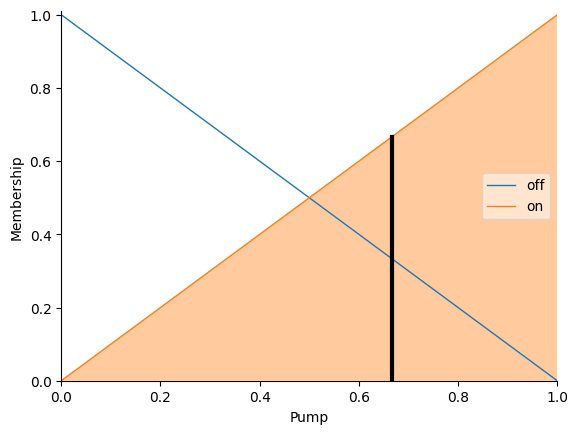

In [ ]:
#SIMULANDO O SISTEMA INPUTANDO VALORES
#OS VALORES INPUTADOS SÃO RESPECTIVAMENTE: BAIXA, BAIXA, BAIXA
print(pump_simulation.input)
print(pump_simulation.output)

pump_simulation.input['Soil Moisture'] = 150
pump_simulation.input['Temperature'] = 15
pump_simulation.input['Air Humidity'] = 15

pump_simulation.compute()

pump.view(sim=pump_simulation)

In [ ]:
#DEFININDO FUNÇÃO PARA OBTERMOS A PORCENTAGEM DA BOMBA QUE DEVE ESTAR LIGADA NO MOMENTO DA SIMULAÇÃO
def fuzzy_decision(soil, temp, humidity):
    pump_simulation.input['Soil Moisture'] = soil
    pump_simulation.input['Temperature'] = temp
    pump_simulation.input['Air Humidity'] = humidity

    pump_simulation.compute()
    return pump_simulation.output['Pump']

In [ ]:
#OBTENDO O VALOR DE VAZÃO COM A PORCENTAGEM OBTIDA NA CELULA ANTERIOR
saida = pump_simulation.output['Pump']
vazao_ideal = (saida * 90.1)
print("A vazão ideal é:",vazao_ideal, "m³/h")


A vazão ideal é: 60.06666666666666 m³/h
